In [6]:
#reading the file
util<-read.csv(file.choose())
head(util,8)
#View(util)
str(util)
summary(util)
util$utilization<-1-util$Percent.Idle

Timestamp,Machine,Percent.Idle
01/09/2016 00:00,RL1,NA
01/09/2016 01:00,RL1,NA
01/09/2016 02:00,RL1,NA
01/09/2016 03:00,RL1,NA
01/09/2016 04:00,RL1,NA
01/09/2016 05:00,RL1,NA
01/09/2016 06:00,RL1,NA
01/09/2016 07:00,RL1,0.01994048


'data.frame':	3600 obs. of  3 variables:
 $ Timestamp   : Factor w/ 720 levels "01/09/2016 00:00",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Machine     : Factor w/ 5 levels "RL1","RL2","SR1",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Percent.Idle: num  NA NA NA NA NA ...


            Timestamp    Machine     Percent.Idle   
 01/09/2016 00:00:   5   RL1 :720   Min.   :0.0000  
 01/09/2016 01:00:   5   RL2 :720   1st Qu.:0.0262  
 01/09/2016 02:00:   5   SR1 :720   Median :0.0410  
 01/09/2016 03:00:   5   SR4A:720   Mean   :0.0431  
 01/09/2016 04:00:   5   SR6 :720   3rd Qu.:0.0576  
 01/09/2016 05:00:   5              Max.   :0.1508  
 (Other)         :3570              NA's   :361     

In [7]:
#handling date-times in r
#uk format or us format
#POSIXct is a universal date time format
#it measures time from 1970 in digits
head(util$Timestamp)

#the below posix will not work because in posix year should be capital Y
#as.POSIXct(util$Timestamp,format="%d/%m/%y %H.%M")
head(util,12)
util$posixtime<-as.POSIXct(util$Timestamp,format="%d/%m/%Y %H:%M")
summary(util)

[1] 01/09/2016 00:00 01/09/2016 01:00 01/09/2016 02:00 01/09/2016 03:00
[5] 01/09/2016 04:00 01/09/2016 05:00
720 Levels: 01/09/2016 00:00 01/09/2016 01:00 ... 30/09/2016 23:00

Timestamp,Machine,Percent.Idle,utilization
01/09/2016 00:00,RL1,NA,NA
01/09/2016 01:00,RL1,NA,NA
01/09/2016 02:00,RL1,NA,NA
01/09/2016 03:00,RL1,NA,NA
01/09/2016 04:00,RL1,NA,NA
01/09/2016 05:00,RL1,NA,NA
01/09/2016 06:00,RL1,NA,NA
01/09/2016 07:00,RL1,0.01994048,0.9800595
01/09/2016 08:00,RL1,0.01997024,0.9800298
01/09/2016 09:00,RL1,0.02119048,0.9788095


            Timestamp    Machine     Percent.Idle     utilization    
 01/09/2016 00:00:   5   RL1 :720   Min.   :0.0000   Min.   :0.8492  
 01/09/2016 01:00:   5   RL2 :720   1st Qu.:0.0262   1st Qu.:0.9424  
 01/09/2016 02:00:   5   SR1 :720   Median :0.0410   Median :0.9590  
 01/09/2016 03:00:   5   SR4A:720   Mean   :0.0431   Mean   :0.9569  
 01/09/2016 04:00:   5   SR6 :720   3rd Qu.:0.0576   3rd Qu.:0.9738  
 01/09/2016 05:00:   5              Max.   :0.1508   Max.   :1.0000  
 (Other)         :3570              NA's   :361      NA's   :361     
   posixtime                  
 Min.   :2016-09-01 00:00:00  
 1st Qu.:2016-09-08 11:45:00  
 Median :2016-09-15 23:30:00  
 Mean   :2016-09-15 23:30:00  
 3rd Qu.:2016-09-23 11:15:00  
 Max.   :2016-09-30 23:00:00  
                              

In [8]:
#rearrange in a df
util$Timestamp<-NULL

In [9]:
util<-util[,c(4,1,2,3)]

In [10]:
head(util,5)

posixtime,Machine,Percent.Idle,utilization
2016-09-01 00:00:00,RL1,NA,NA
2016-09-01 01:00:00,RL1,NA,NA
2016-09-01 02:00:00,RL1,NA,NA
2016-09-01 03:00:00,RL1,NA,NA
2016-09-01 04:00:00,RL1,NA,NA


In [11]:
summary(util)
#uto RL1 it gives true for rest it will display false
util$Machine=="RL1"
#it will give the rows with RL1 data and all columns
util[util$Machine=="RL1",]
#assigning to RL1 
RL1<-util[util$Machine=="RL1",]
head(RL1)

   posixtime                   Machine     Percent.Idle     utilization    
 Min.   :2016-09-01 00:00:00   RL1 :720   Min.   :0.0000   Min.   :0.8492  
 1st Qu.:2016-09-08 11:45:00   RL2 :720   1st Qu.:0.0262   1st Qu.:0.9424  
 Median :2016-09-15 23:30:00   SR1 :720   Median :0.0410   Median :0.9590  
 Mean   :2016-09-15 23:30:00   SR4A:720   Mean   :0.0431   Mean   :0.9569  
 3rd Qu.:2016-09-23 11:15:00   SR6 :720   3rd Qu.:0.0576   3rd Qu.:0.9738  
 Max.   :2016-09-30 23:00:00              Max.   :0.1508   Max.   :1.0000  
                                          NA's   :361      NA's   :361     

[1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [25]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [37]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [49]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [61]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [73]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [85]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [97]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [109]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [121]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [133]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [145]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [157]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [169]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [181]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [193]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [205]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [217]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [229]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [241]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [253]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [265]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [277]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [289]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [301]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [313]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [325]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [337]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [349]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [361]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [373]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [385]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [397]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [409]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [421]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [433]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [445]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [457]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [469]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [481]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [493]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [505]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [517]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [529]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [541]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [553]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [565]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [577]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [589]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [601]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRU

posixtime,Machine,Percent.Idle,utilization
2016-09-01 00:00:00,RL1,NA,NA
2016-09-01 01:00:00,RL1,NA,NA
2016-09-01 02:00:00,RL1,NA,NA
2016-09-01 03:00:00,RL1,NA,NA
2016-09-01 04:00:00,RL1,NA,NA
2016-09-01 05:00:00,RL1,NA,NA
2016-09-01 06:00:00,RL1,NA,NA
2016-09-01 07:00:00,RL1,0.01994048,0.9800595
2016-09-01 08:00:00,RL1,0.01997024,0.9800298
2016-09-01 09:00:00,RL1,0.02119048,0.9788095


posixtime,Machine,Percent.Idle,utilization
2016-09-01 00:00:00,RL1,NA,NA
2016-09-01 01:00:00,RL1,NA,NA
2016-09-01 02:00:00,RL1,NA,NA
2016-09-01 03:00:00,RL1,NA,NA
2016-09-01 04:00:00,RL1,NA,NA
2016-09-01 05:00:00,RL1,NA,NA


In [12]:
summary(RL1)


   posixtime                   Machine     Percent.Idle      utilization    
 Min.   :2016-09-01 00:00:00   RL1 :720   Min.   :0.00500   Min.   :0.8492  
 1st Qu.:2016-09-08 11:45:00   RL2 :  0   1st Qu.:0.03208   1st Qu.:0.9403  
 Median :2016-09-15 23:30:00   SR1 :  0   Median :0.04613   Median :0.9539  
 Mean   :2016-09-15 23:30:00   SR4A:  0   Mean   :0.04830   Mean   :0.9517  
 3rd Qu.:2016-09-23 11:15:00   SR6 :  0   3rd Qu.:0.05967   3rd Qu.:0.9679  
 Max.   :2016-09-30 23:00:00              Max.   :0.15077   Max.   :0.9950  
                                          NA's   :7         NA's   :7       

In [13]:
#removing all machines data except RL1
RL1$Machine<-factor(RL1$Machine)
summary(RL1)

   posixtime                   Machine    Percent.Idle      utilization    
 Min.   :2016-09-01 00:00:00   RL1:720   Min.   :0.00500   Min.   :0.8492  
 1st Qu.:2016-09-08 11:45:00             1st Qu.:0.03208   1st Qu.:0.9403  
 Median :2016-09-15 23:30:00             Median :0.04613   Median :0.9539  
 Mean   :2016-09-15 23:30:00             Mean   :0.04830   Mean   :0.9517  
 3rd Qu.:2016-09-23 11:15:00             3rd Qu.:0.05967   3rd Qu.:0.9679  
 Max.   :2016-09-30 23:00:00             Max.   :0.15077   Max.   :0.9950  
                                         NA's   :7         NA's   :7       

In [14]:
RL1$utilization
#here the problem is he min value it is showing as Na
min(RL1$utilization)
#here we removed NA
min(RL1$utilization,na.rm = T)

[1]        NA        NA        NA        NA        NA        NA        NA
  [8] 0.9800595 0.9800298 0.9788095 0.9862500 0.9808333 0.9691369 0.9691369
 [15] 0.9662202 0.9575298 0.9575000 0.9664286 0.9631845 0.9645833 0.9810119
 [22] 0.9810119 0.9839881 0.9817560 0.9816071 0.9562798 0.9595238 0.9519345
 [29] 0.9519345 0.9063988 0.8793750 0.8646131 0.8647917 0.8901190 0.8901190
 [36] 0.8699107 0.8634226 0.9089583 0.9250298 0.9483036 0.9483333 0.9482440
 [43] 0.9482440 0.9731548 0.9793750 0.9749107 0.9857738 0.9881845 0.9675298
 [50] 0.9671131 0.9670238 0.9669048 0.9500298 0.9344940 0.9297619 0.9293452
 [57] 0.9500000 0.9499107 0.9493452 0.9563690 0.9694345 0.9892560 0.9940774
 [64] 0.9944940 0.9875893 0.9751190 0.9757738 0.9689881 0.9730655 0.9679167
 [71] 0.9679167 0.9676190 0.9745238 0.9872321 0.9864583 0.9844643 0.9843155
 [78] 0.9730357 0.9718750 0.9713690 0.9712798 0.9713095 0.9720833 0.9808036
 [85] 0.9775298 0.9931548 0.9936905 0.9928869 0.9929762 0.9840476 0.9840476
 [92] 0.9816369 0.9746429 0.9732440 0.9675000 0.9691071 0.9576786 0.9539881
 [99] 0.9532440 0.9258631 0.9362798 0.9242262 0.9305952 0.9305952 0.9417262
[106] 0.9546726 0.9327381 0.9550298 0.9303571 0.9376488 0.9372321 0.9249405
[113] 0.9252381 0.9042560 0.9251786 0.9327381 0.9574107 0.9631548 0.9539881
[120] 0.9501786 0.9494048 0.9580655 0.9560417 0.9549405 0.9355655 0.9181250
[127] 0.9266369 0.9412202 0.9216667 0.9184226 0.9219643 0.9230655 0.9424405
[134] 0.9612798 0.9599107 0.9498512 0.9701786 0.9856548 0.9845238 0.9845238
[141] 0.9845238 0.9597321 0.9570833 0.9546726 0.9546726 0.9533631 0.9444345
[148] 0.9444345 0.9444345 0.9584226 0.9635119 0.9720833 0.9687500 0.9690774
[155] 0.9793750 0.9648214 0.9486607 0.9580952 0.9580952 0.9434821 0.9320833
[162] 0.9331548 0.9331548 0.9468452 0.9630060 0.9534821 0.9529167 0.9729464
[169] 0.9851786 0.9846131 0.9841667 0.9764286 0.9758036 0.9854167 0.9859821
[176] 0.9844048 0.9863393 0.9859524 0.9863988 0.9936310 0.9939583 0.9950000
[183] 0.9950000 0.9825000 0.9830655 0.9759821 0.9671131 0.9486607 0.9469940
[190] 0.9433036 0.9433036 0.9566071 0.9566071 0.9609821 0.9625595 0.9621429
[197] 0.9641071 0.9680357 0.9665774 0.9673512 0.9510417 0.9547024 0.9606548
[204] 0.9759821 0.9738393 0.9716667 0.9678274 0.9644345 0.9674702 0.9674702
[211] 0.9653869 0.9575298 0.9596726 0.9523512 0.9576488 0.9605060 0.9640476
[218] 0.9640476 0.9314583 0.9407738 0.9378869 0.9473810 0.9449405 0.9130655
[225] 0.9212202 0.9206548 0.9507738 0.9530060 0.9517560 0.9497619 0.9441369
[232] 0.9743452 0.9728571 0.9662500 0.9695833 0.9582738 0.9595536 0.9615476
[239] 0.9667857 0.9689881 0.9720536 0.9784524 0.9774702 0.9880655 0.9851786
[246] 0.9785119 0.9770536 0.9710417 0.9578869 0.9586607 0.9622024 0.9641369
[253] 0.9694643 0.9591369 0.9525298 0.9577976 0.9536310 0.9536310 0.9487798
[260] 0.9351786 0.9329167 0.9499107 0.9596726 0.9426488 0.9570536 0.9441964
[267] 0.9490476 0.9595536 0.9622321 0.9589286 0.9439286 0.9605060 0.9484821
[274] 0.9613393 0.9562202 0.9584821 0.9508631 0.9541667 0.9641964 0.9653869
[281] 0.9803274 0.9444048 0.9495238 0.9503571 0.9576786 0.9558036 0.9511607
[288] 0.9480952 0.9480952 0.9809524 0.9792857 0.9649702 0.9652679 0.9658333
[295] 0.9754167 0.9784821 0.9723512 0.9685119 0.9694048 0.9710417 0.9710417
[302] 0.9723512 0.9681845 0.9573810 0.9480060 0.9549107 0.9503274 0.9622024
[309] 0.9576786 0.9572917 0.9625893 0.9617262 0.9753869 0.9738988 0.9785417
[316] 0.9661905 0.9686905 0.9614286 0.9514881 0.9561310 0.9434821 0.9332738
[323] 0.9205357 0.9214881 0.9090179 0.8929167 0.8859821 0.8797024 0.8917560
[330] 0.8870833 0.8848810 0.8940476 0.9085417 0.9207440 0.9376488 0.9403274
[337] 0.9315774 0.9465179 0.9563690 0.9594048 0.9569345 0.9684821 0.9663988
[344] 0.9761607 0.9861012 0.9858631 0.9916667 0.9916667 0.9917262 0.9917262
[351] 0.9938095 0.9801786 0.9775000 0.9791667 0.9554167 0.9526786 0.9475595
[358] 0.9475595 0.9475595 0.9533631 0.9458333 0.9458333 0.9681548 0.9558631
[365] 0.9633929 0.9609821 0.9444643 0.9531548 0.95

[1] NA

[1] 0.8492262

In [15]:
stats_rl1<-list(c(min(RL1$utilization,na.rm = T),
             mean(RL1$utilization,na.rm = T),
             max(RL1$utilization,na.rm = T)))
stats_rl1

[[1]]
[1] 0.8492262 0.9516976 0.9950000

In [17]:
#logical:has utilization ever fallen below 90% True or False
#RL1$utilization<0.90
#which ignores NA
which(RL1$utilization<0.90)

[1]  31  32  33  34  35  36  37 326 327 328 329 330 331 332 484 485 486 487 488
[20] 489 490 491 702 703 704 705 706

In [18]:
#it will display how many times it had fallen below under 90
length(which(RL1$utilization<0.90))

[1] 27

In [19]:
#converting into logical
length(which(RL1$utilization<0.90))>0
util_under90<-length(which(RL1$utilization<0.90))>0

[1] TRUE

In [20]:
#creating list
list_rl1<-c("RL1",stats_rl1,util_under90)
#Assigning names
names(list_rl1)
names(list_rl1)<-c("Machine","Stats","LowThresold")

NULL

In [21]:
list_rl1

$Machine
[1] "RL1"

$Stats
[1] 0.8492262 0.9516976 0.9950000

$LowThresold
[1] TRUE

In [22]:
RL1
#here we are extracting the na values
RL1[is.na(RL1$utilization),]
RL1[is.na(RL1$utilization),"posixtime"]
list_rl1$unknownHours<-(RL1[is.na(RL1$utilization),"posixtime"])

posixtime,Machine,Percent.Idle,utilization
2016-09-01 00:00:00,RL1,NA,NA
2016-09-01 01:00:00,RL1,NA,NA
2016-09-01 02:00:00,RL1,NA,NA
2016-09-01 03:00:00,RL1,NA,NA
2016-09-01 04:00:00,RL1,NA,NA
2016-09-01 05:00:00,RL1,NA,NA
2016-09-01 06:00:00,RL1,NA,NA
2016-09-01 07:00:00,RL1,0.01994048,0.9800595
2016-09-01 08:00:00,RL1,0.01997024,0.9800298
2016-09-01 09:00:00,RL1,0.02119048,0.9788095


posixtime,Machine,Percent.Idle,utilization
2016-09-01 00:00:00,RL1,NA,NA
2016-09-01 01:00:00,RL1,NA,NA
2016-09-01 02:00:00,RL1,NA,NA
2016-09-01 03:00:00,RL1,NA,NA
2016-09-01 04:00:00,RL1,NA,NA
2016-09-01 05:00:00,RL1,NA,NA
2016-09-01 06:00:00,RL1,NA,NA


[1] "2016-09-01 00:00:00 IST" "2016-09-01 01:00:00 IST"
[3] "2016-09-01 02:00:00 IST" "2016-09-01 03:00:00 IST"
[5] "2016-09-01 04:00:00 IST" "2016-09-01 05:00:00 IST"
[7] "2016-09-01 06:00:00 IST"

Warning message:
"Removed 35 rows containing missing values (geom_path)."

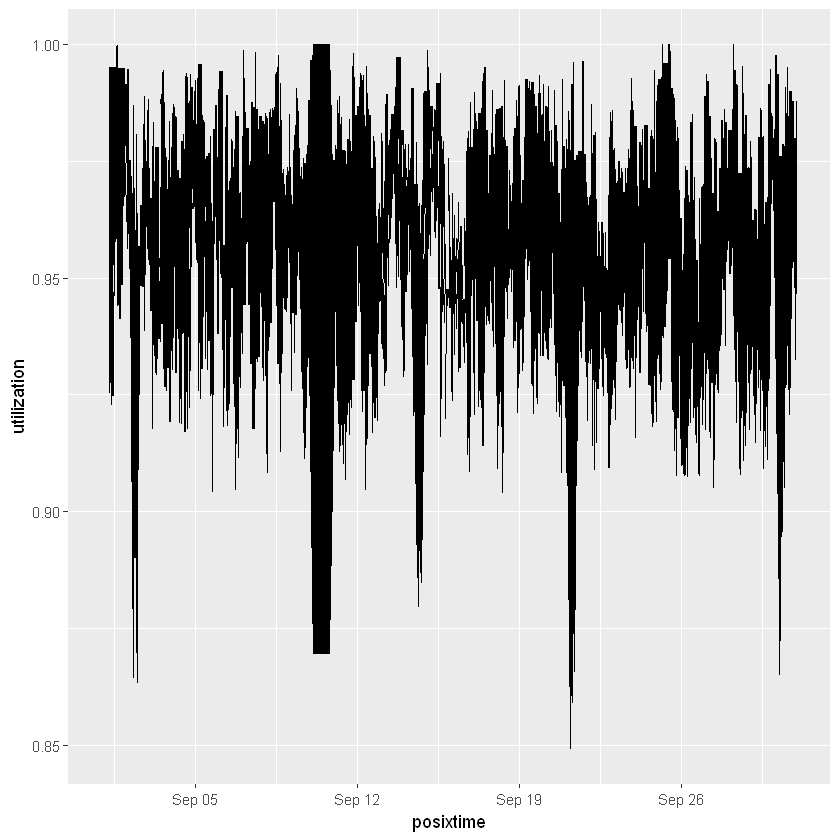

In [23]:
#visualization
library(ggplot2)
p<-ggplot(data=util)
p+geom_line(aes(x=posixtime,y=utilization))

Warning message:
"Removed 155 rows containing missing values (geom_path)."

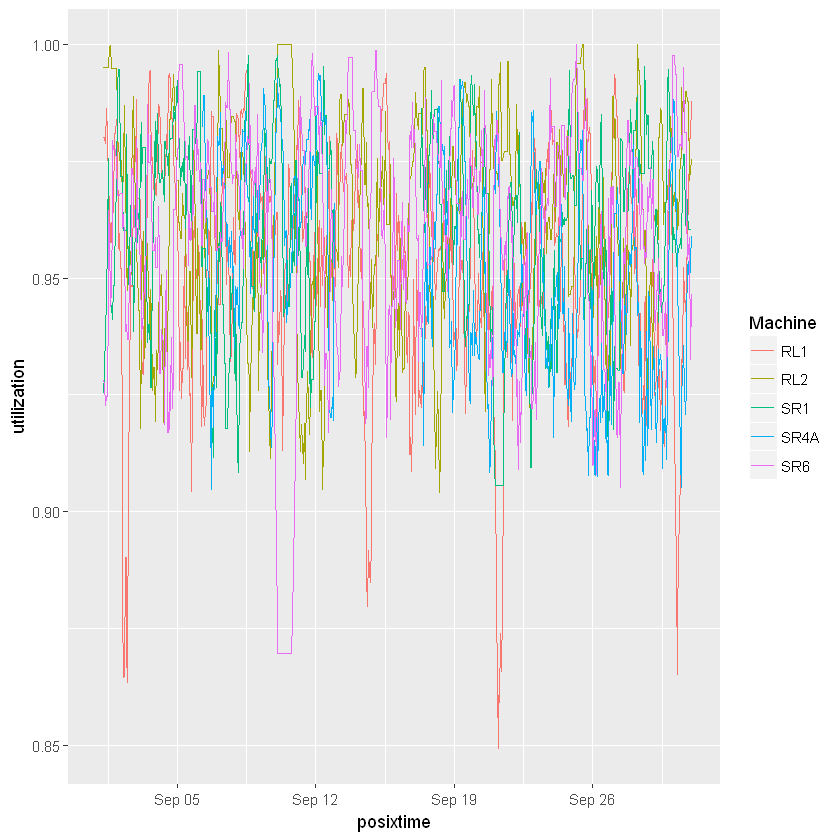

In [25]:
#mapping
p+geom_line(aes(x=posixtime,y=utilization,colour=Machine))
#increasing size for better visualization

Warning message:
"Removed 155 rows containing missing values (geom_path)."

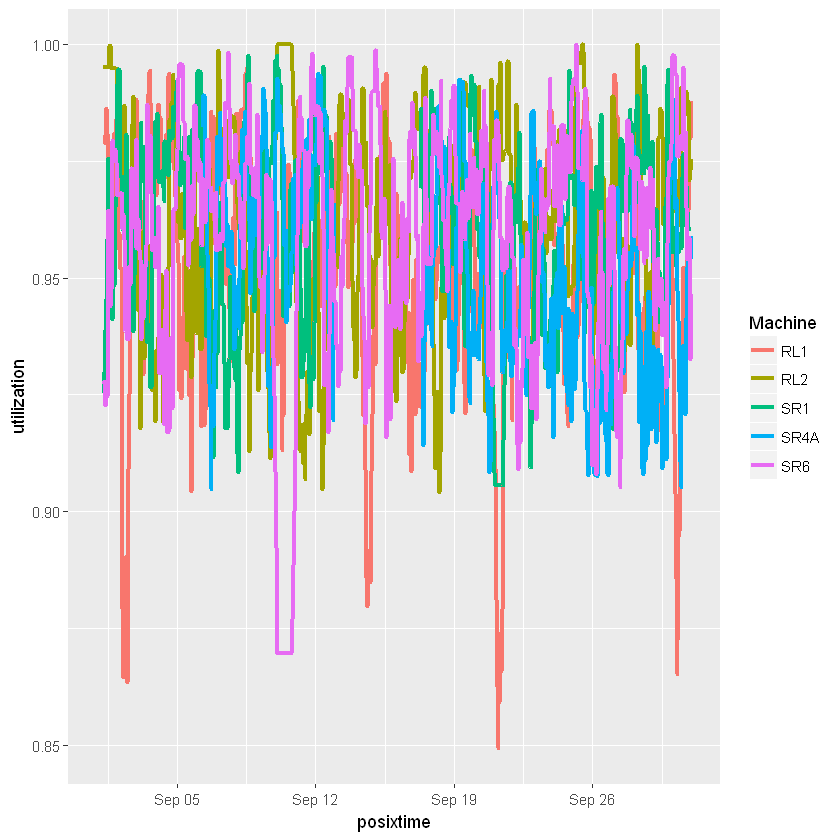

In [26]:
p+geom_line(aes(x=posixtime,y=utilization,colour=Machine),size=1.2)

Warning message:
"Removed 155 rows containing missing values (geom_path)."

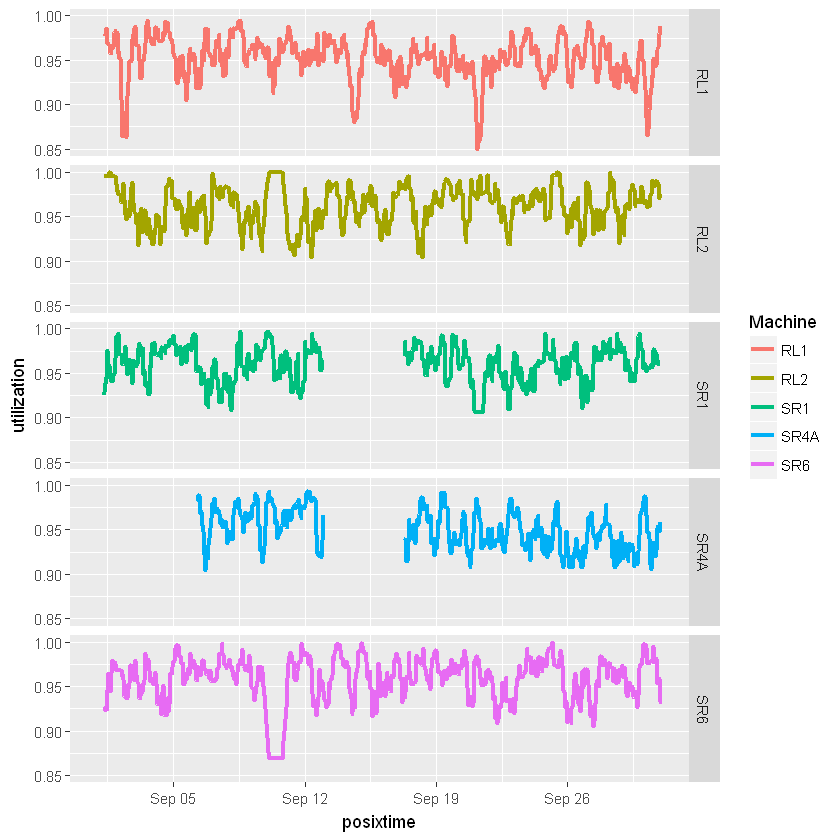

In [29]:
#using facet_grid to seperate plots
p+geom_line(aes(x=posixtime,y=utilization,colour=Machine),size=1.2)+facet_grid(Machine~.)

Warning message:
"Removed 155 rows containing missing values (geom_path)."

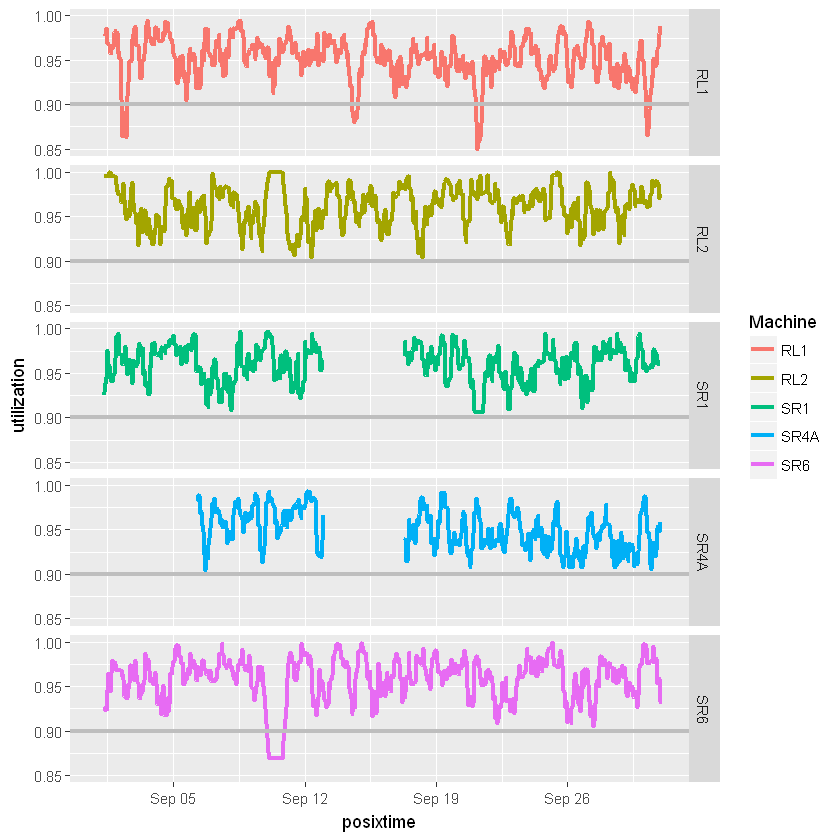

In [28]:
#i want to add a horizantal line at 90% as that our lower thresold
p+geom_line(aes(x=posixtime,y=utilization,colour=Machine),size=1.2)+facet_grid(Machine~.)+geom_hline(yintercept = 0.9,colour="gray",size=1.2)

Warning message:
"Removed 155 rows containing missing values (geom_path)."

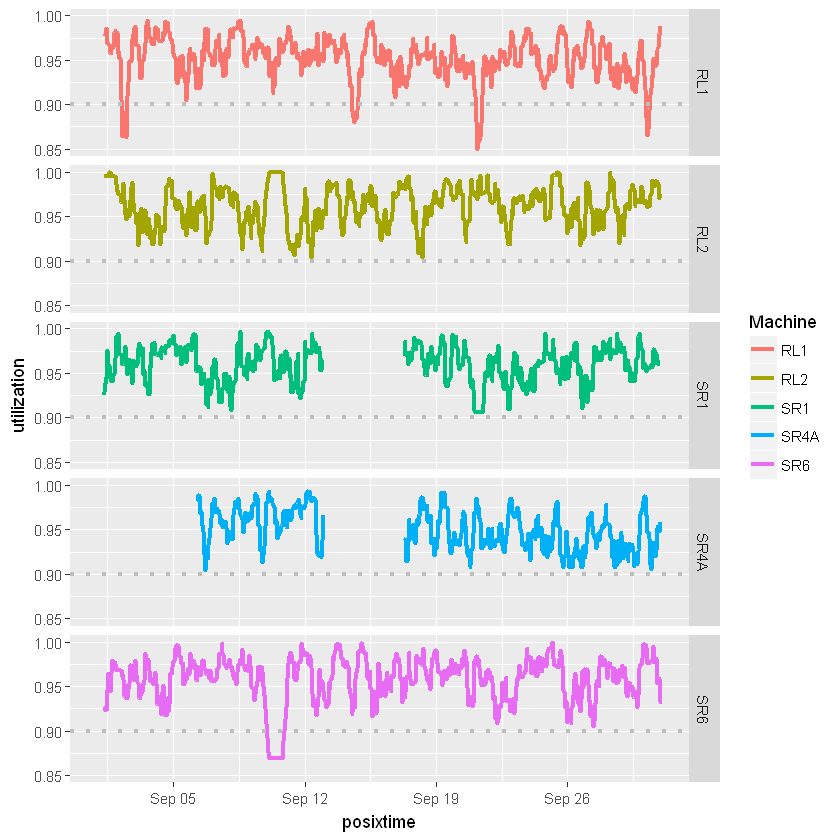

In [30]:
#here we are trying to make our line as dotted line
p+geom_line(aes(x=posixtime,y=utilization,colour=Machine),size=1.2)+facet_grid(Machine~.)+geom_hline(yintercept = 0.90,colour="gray",size=1.2,linetype=3)

In [31]:
myplot<-p+geom_line(aes(x=posixtime,y=utilization,colour=Machine),size=1.2)+facet_grid(Machine~.)+geom_hline(yintercept = 0.90,colour="gray",size=1.2,linetype=3)
str(myplot)

List of 9
 $ data       :'data.frame':	3600 obs. of  4 variables:
  ..$ posixtime   : POSIXct[1:3600], format: "2016-09-01 00:00:00" "2016-09-01 01:00:00" ...
  ..$ Machine     : Factor w/ 5 levels "RL1","RL2","SR1",..: 1 1 1 1 1 1 1 1 1 1 ...
  ..$ Percent.Idle: num [1:3600] NA NA NA NA NA ...
  ..$ utilization : num [1:3600] NA NA NA NA NA ...
 $ layers     :List of 2
  ..$ :Classes 'LayerInstance', 'Layer', 'ggproto' <ggproto object: Class LayerInstance, Layer>
    aes_params: list
    compute_aesthetics: function
    compute_geom_1: function
    compute_geom_2: function
    compute_position: function
    compute_statistic: function
    data: waiver
    draw_geom: function
    finish_statistics: function
    geom: <ggproto object: Class GeomLine, GeomPath, Geom>
        aesthetics: function
        default_aes: uneval
        draw_group: function
        draw_key: function
        draw_layer: function
        draw_panel: function
        extra_params: na.rm
        handle_na: functi